Iteration 1000, Cost: 82564430.38704574
Iteration 2000, Cost: 71276878.67058949
Iteration 3000, Cost: 69660836.17854129
Iteration 4000, Cost: 69429464.98375154
Iteration 5000, Cost: 69396337.36794363
Iteration 6000, Cost: 69391592.31258799
Iteration 7000, Cost: 69390910.79245326
Iteration 8000, Cost: 69390811.04937436
Iteration 9000, Cost: 69390794.59955901
Iteration 10000, Cost: 69390790.07501458


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


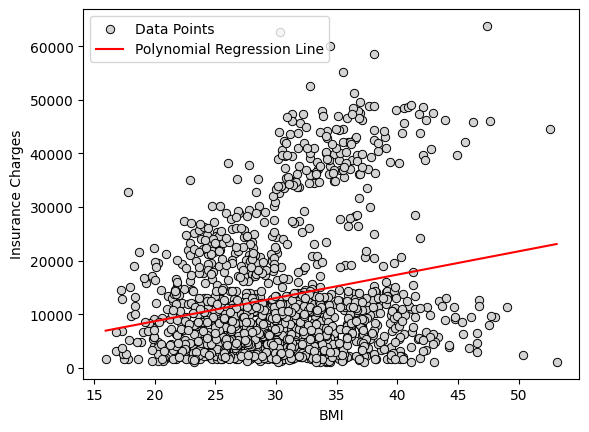

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv("/content/insurance.csv")

# Select the "bmi" feature as X and the target variable "charges" as y
X = data[['bmi']]
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 1  # You can adjust the degree as needed
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize parameters
alpha = 0.000001  # Learning rate
num_iterations = 10000
theta = np.zeros(degree + 1)  # Parameters for the polynomial model

# Gradient Descent optimization
cost_history = []

for i in range(num_iterations):
    # Calculate predictions and error
    predictions = np.dot(X_train_poly, theta)
    error = predictions - y_train

    # Calculate the gradient
    gradient = np.dot(X_train_poly.T, error) / len(y_train)

    # Update theta using the gradient and learning rate
    theta -= alpha * gradient

    # Compute the cost
    cost = np.mean(error ** 2) / 2
    cost_history.append(cost)

    if (i + 1) % 1000 == 0:
        print(f"Iteration {i + 1}, Cost: {cost}")

# Sort the data for plotting
X_sorted = np.sort(X_train, axis=0)
y_pred_sorted = np.dot(poly.transform(X_sorted), theta)

# Plot the scatter plot of the data with violet data points and black outlines
plt.scatter(X, y, label='Data Points', color='lightgray', edgecolor='black', linewidth=.7)
plt.xlabel("BMI")
plt.ylabel("Insurance Charges")

# Plot the learned polynomial regression line
plt.plot(X_sorted, y_pred_sorted, color='red', label='Polynomial Regression Line')

plt.legend()
plt.show()